# Latent Dirichlet Allocation

In [1]:
import nltk
from nltk.corpus import stopwords as stpw

from stopwords import stopwords as custom_stpw

import numpy as np
import pandas as pd
import re
import string 

import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk.download('stopwords')

In [2]:
MAX_FEATURES = 1000
# For reproducibility
np.random.seed(0)

## Get the dataset

In [3]:
train_set = pd.read_csv("./data/cleaned_train_dataset.csv")
test_set = pd.read_csv("./data/cleaned_test_dataset.csv")

## Preprocessing

In [4]:
start = time.time()

matrix = TfidfVectorizer(
    max_features=MAX_FEATURES,
    stop_words=set(stpw.words("english")+custom_stpw),
    lowercase=False,
)

matrix.fit(train_set.features)

# learns the vocabulary dictionnary and returns document-term matrix as a Numpy Array.
X_train = matrix.transform(train_set.features).toarray()

TFTime = time.time()
print(f"TF-IDF Vectorizer : {TFTime - start :.04}s")

TF-IDF Vectorizer : 4.832s


## Latent Dirichlet Allocation

Top 50 words in topic 0
-------------------------
['humour', 'funniest', 'glad', 'favourite', 'incredible', 'gem', 'comic', 'talent', 'happy', 'awesome', 'greatest', 'pretty', 'enjoyable', 'sweet', 'touching', 'cute', 'bad', 'charming', 'entertaining', 'disappointed', 'superb', 'kind', 'special', 'interesting', 'fantastic', 'nice', 'hilarious', 'romantic', 'brilliant', 'read', 'laugh', 'original', 'classic', 'real', 'perfect', 'amazing', 'excellent', 'enjoyed', 'better', 'beautiful', 'favorite', 'enjoy', 'fun', 'wonderful', 'loved', 'funny', 'best', 'love', 'good', 'great']


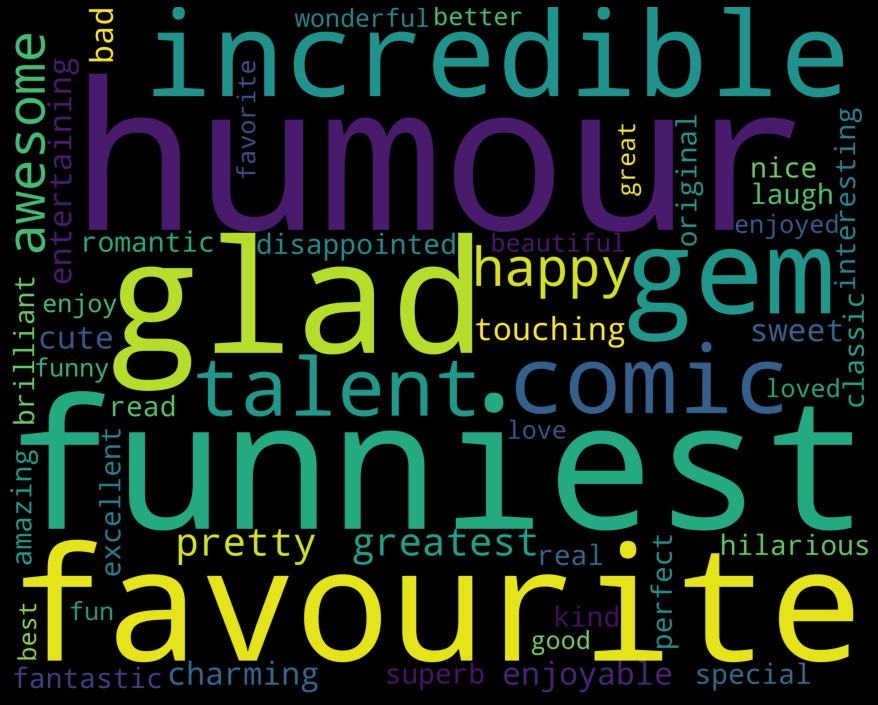

Top 50 words in topic 1
-------------------------
['decent', 'blonde', 'scare', 'beautiful', 'candy', 'suspense', 'science', 'kong', 'cult', 'scared', 'tree', 'ridiculous', 'skip', 'funny', 'rob', 'demon', 'worst', 'strange', 'dull', 'cheap', 'experiment', 'basic', 'race', 'boring', 'creepy', 'wrong', 'special', 'classic', 'silly', 'scary', 'mad', 'serial', 'poor', 'fun', 'lack', 'gore', 'love', 'nice', 'unfortunately', 'original', 'kind', 'scientist', 'real', 'best', 'interesting', 'great', 'pretty', 'better', 'bad', 'good']


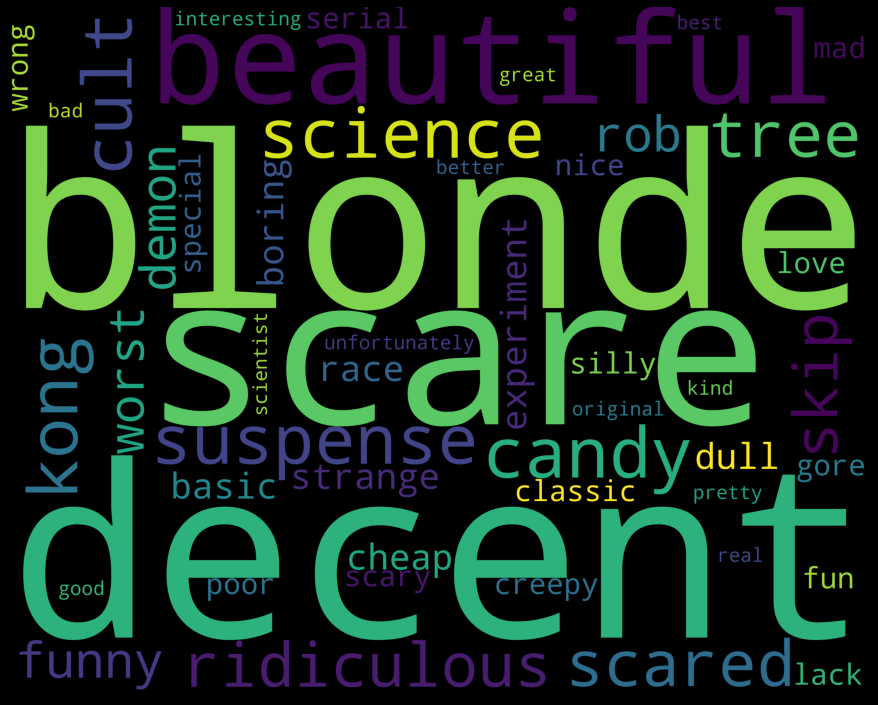

Top 50 words in topic 2
-------------------------
['unfunny', 'disappointed', 'scary', 'lack', 'weak', 'pointless', 'mess', 'fun', 'plain', 'trash', 'predictable', 'cheap', 'hate', 'badly', 'pathetic', 'garbage', 'dumb', 'interesting', 'suck', 'wasted', 'read', 'decent', 'best', 'ridiculous', 'annoying', 'love', 'poorly', 'special', 'wrong', 'lame', 'original', 'real', 'kind', 'great', 'poor', 'pretty', 'crap', 'laugh', 'boring', 'horrible', 'worse', 'stupid', 'terrible', 'awful', 'better', 'waste', 'funny', 'worst', 'good', 'bad']


Top 50 words in topic 3
-------------------------
['award', 'narrative', 'ultimately', 'unique', 'tragedy', 'unfortunately', 'poor', 'remarkable', 'particular', 'medium', 'nice', 'complex', 'amazing', 'realistic', 'lack', 'pretty', 'lover', 'fascinating', 'famous', 'portrayed', 'beauty', 'personal', 'perfect', 'difficult', 'brilliant', 'bad', 'historical', 'culture', 'wonderful', 'modern', 'classic', 'emotional', 'indian', 'issue', 'read', 'original', 'strong', 'kind', 'powerful', 'fine', 'oscar', 'better', 'beautiful', 'excellent', 'interesting', 'real', 'best', 'love', 'great', 'good']


Top 50 words in topic 4
-------------------------
['dull', 'typical', 'monkey', 'routine', 'crazy', 'awesome', 'decent', 'cheesy', 'odd', 'excellent', 'trek', 'strange', 'football', 'pilot', 'columbo', 'suspense', 'special', 'stunt', 'boring', 'creepy', 'jackie', 'classic', 'weird', 'robin', 'lynch', 'freddy', 'moore', 'dragon', 'entertaining', 'scary', 'woody', 'nightmare', 'gore', 'nice', 'baseball', 'kind', 'cool', 'real', 'funny', 'fun', 'interesting', 'love', 'slasher', 'better', 'bad', 'best', 'original', 'pretty', 'great', 'good']


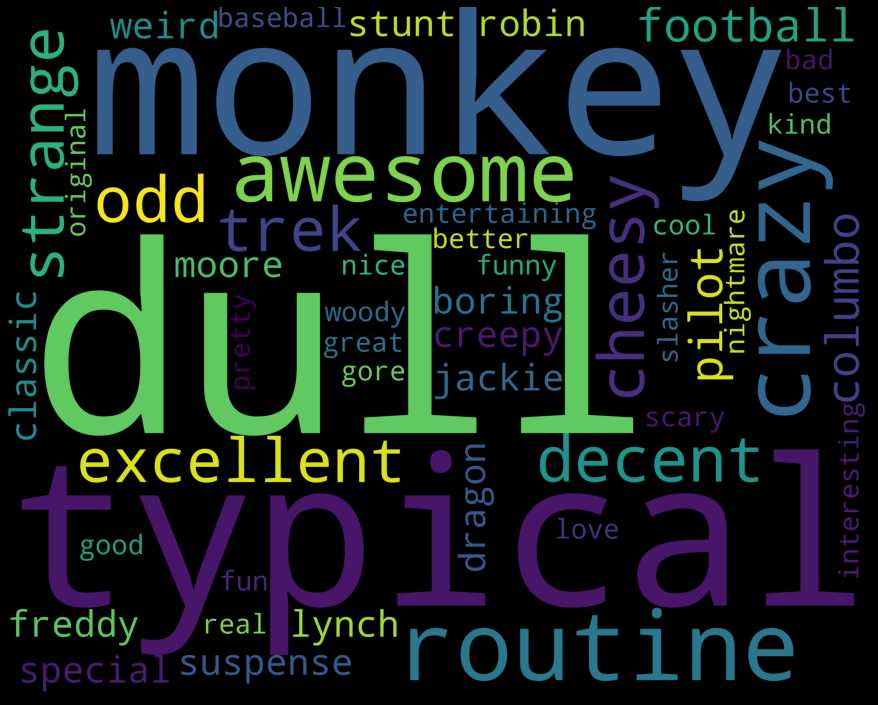

In [5]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit_transform(X_train)

features = matrix.get_feature_names()

for ind, topic in enumerate(lda.components_):
    print('Top 50 words in topic {}'.format(ind))
    print('-'*25)
    top_50 = topic.argsort()[-50:]    
    words = [features[i] for i in top_50]  
    print(words)

    joined_words = " ".join(words)    
    wordcloud = WordCloud(width = 5000, height = 4000, background_color ='black',min_font_size = 10).generate(joined_words)
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show() 